In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Data file paths
mushroom_path = "secondary_data_no_miss.csv"

# Read the data files
mushroom_data = pd.read_csv(mushroom_path, sep = ";")

mushroom_data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,1.26,x,g,y,f,d,c,w,5.04,1.73,y,f,f,d,a
1,e,10.32,f,e,b,f,a,c,b,4.68,19.44,w,t,f,d,a
2,p,0.92,x,g,p,f,a,c,p,4.59,1.15,k,f,f,d,u
3,p,4.27,x,t,p,f,x,c,w,4.55,6.52,w,f,f,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,5.18,w,f,f,m,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,12.79,x,e,n,t,p,c,e,9.60,25.61,y,f,f,d,u
61065,p,2.42,x,d,w,f,a,d,p,3.52,2.20,w,f,f,g,u
61066,e,12.33,s,t,u,f,s,c,u,7.71,21.99,u,f,f,d,a
61067,p,3.85,s,w,u,f,a,c,u,5.32,5.59,u,f,f,l,a


In [10]:
# Establis X and y

y = mushroom_data["class"]
target_names = ["edible", "poisonous"]

# Need to drop all non-integer columns for KNN
# X = mushroom_data.drop("class", axis=1)
X = mushroom_data[["cap-diameter", "stem-height", "stem-width"]]
X.head()

,cap-diameter,stem-height,stem-width
0,1.26,5.04,1.73
1,10.32,4.68,19.44
2,0.92,4.59,1.15
3,4.27,4.55,6.52
4,3.08,2.67,5.18


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.754
k: 3, Train/Test Score: 0.879/0.777
k: 5, Train/Test Score: 0.854/0.785
k: 7, Train/Test Score: 0.844/0.791
k: 9, Train/Test Score: 0.838/0.796
k: 11, Train/Test Score: 0.833/0.797
k: 13, Train/Test Score: 0.830/0.798
k: 15, Train/Test Score: 0.828/0.800
k: 17, Train/Test Score: 0.825/0.801
k: 19, Train/Test Score: 0.824/0.801
k: 21, Train/Test Score: 0.823/0.799
k: 23, Train/Test Score: 0.821/0.799
k: 25, Train/Test Score: 0.821/0.801
k: 27, Train/Test Score: 0.819/0.800
k: 29, Train/Test Score: 0.819/0.800
k: 31, Train/Test Score: 0.819/0.800
k: 33, Train/Test Score: 0.817/0.801
k: 35, Train/Test Score: 0.817/0.799
k: 37, Train/Test Score: 0.817/0.799
k: 39, Train/Test Score: 0.816/0.799


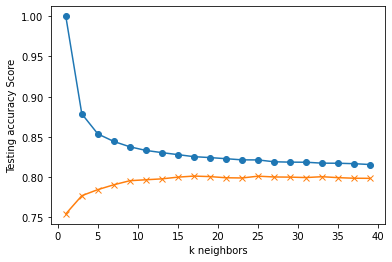

In [15]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.801


In [23]:
# Let's try a neural network

from tensorflow.keras.utils import to_categorical

In [25]:
mushroom_data = mushroom_data[]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,1.26,x,g,y,f,d,c,w,5.04,1.73,y,f,f,d,a
1,e,10.32,f,e,b,f,a,c,b,4.68,19.44,w,t,f,d,a
2,p,0.92,x,g,p,f,a,c,p,4.59,1.15,k,f,f,d,u
3,p,4.27,x,t,p,f,x,c,w,4.55,6.52,w,f,f,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,5.18,w,f,f,m,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,12.79,x,e,n,t,p,c,e,9.60,25.61,y,f,f,d,u
61065,p,2.42,x,d,w,f,a,d,p,3.52,2.20,w,f,f,g,u
61066,e,12.33,s,t,u,f,s,c,u,7.71,21.99,u,f,f,d,a
61067,p,3.85,s,w,u,f,a,c,u,5.32,5.59,u,f,f,l,a


In [19]:
# # One-hot encoding
# y_train_categorical = to_categorical(y_train)
# y_test_categorical = to_categorical(y_test)
# y_train_categorical